## The retirement gap

Data scource: OECD (Organisation for economic co-operation and development)
https://stats.oecd.org/index.aspx?queryid=54758

Hypothesis: The time it takes to retire is directly proportional to earnings. Thanks to pay gap, there must exist a retirement gap.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "data/OECD/all_countries_retirement_data.csv"
data = pd.read_csv(url)
data.head()

,COU,Country,IND,Indicator,SEX,Sex,AGE,Age Group,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,EMP16,"Expected number of years in retirement, by sex",MEN,Men,TOTAL,Total,2010,2010,YR,Years,0,Units,NaN,NaN,19.6,NaN,NaN
1,AUS,Australia,EMP16,"Expected number of years in retirement, by sex",MEN,Men,TOTAL,Total,2012,2012,YR,Years,0,Units,NaN,NaN,19.5,NaN,NaN
2,AUS,Australia,EMP16,"Expected number of years in retirement, by sex",WOMEN,Women,TOTAL,Total,2010,2010,YR,Years,0,Units,NaN,NaN,24.1,NaN,NaN
3,AUS,Australia,EMP16,"Expected number of years in retirement, by sex",WOMEN,Women,TOTAL,Total,2012,2012,YR,Years,0,Units,NaN,NaN,24.2,NaN,NaN
4,AUT,Austria,EMP16,"Expected number of years in retirement, by sex",MEN,Men,TOTAL,Total,2010,2010,YR,Years,0,Units,NaN,NaN,21.9,NaN,NaN


In [4]:
data.shape

(2424, 19)

In [5]:
data = data[["COU","Country","Sex","Time","Value"]]
data.head()

,COU,Country,Sex,Time,Value
0,AUS,Australia,Men,2010,19.6
1,AUS,Australia,Men,2012,19.5
2,AUS,Australia,Women,2010,24.1
3,AUS,Australia,Women,2012,24.2
4,AUT,Austria,Men,2010,21.9


In [6]:
uk_data = data.loc[data['COU'] == 'GBR']
uk_data.head()

,COU,Country,Sex,Time,Value
112,GBR,United Kingdom,Men,2010,18.9
113,GBR,United Kingdom,Men,2012,19.3
114,GBR,United Kingdom,Women,2010,23.4
115,GBR,United Kingdom,Women,2012,23.1
168,GBR,United Kingdom,Women,2014,23.1


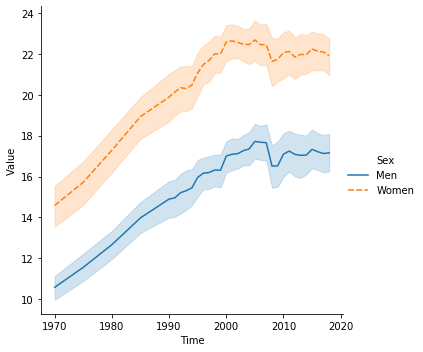

In [7]:
#sns.set(style="whitegrid")
sns.relplot(x="Time", y="Value",
            hue="Sex", style="Sex",
            kind="line", data=data);
# sns.relplot(x="Time", y="Value", hue="Sex",
#           data=uk_data);

Get year values for (women - men) for uk_data

In [8]:
new_uk_data = pd.pivot_table(uk_data, index=['Time'],
                        columns=['Sex'],values=['Value'])
new_data = pd.pivot_table(data, index=['Time'],
                        columns=['Sex'],values=['Value'])
#aggfunc='mean'

In [9]:
new_uk_data.columns =[s2 for (s1,s2) in new_uk_data.columns.tolist()]
new_data.columns =[s2 for (s1,s2) in new_data.columns.tolist()]

new_data.head()

,Men,Women
Time,,
1970,10.578571,14.582143
1975,11.558621,15.720690
1980,12.666667,17.286667
1985,13.976667,18.930000
1990,14.896774,19.887097


In [10]:
new_uk_data['Gap'] = new_uk_data['Women'] - new_uk_data['Men']
new_uk_data.head()
new_data['Gap'] = new_data['Women'] - new_data['Men']
new_data.head()

,Men,Women,Gap
Time,,,
1970,10.578571,14.582143,4.003571
1975,11.558621,15.720690,4.162069
1980,12.666667,17.286667,4.620000
1985,13.976667,18.930000,4.953333
1990,14.896774,19.887097,4.990323


In [11]:
new_data.shape
new_data['Retirement_gap'] = (new_data['Gap'] / new_data['Men']) * 100 #convert to percentage
new_uk_data['Retirement_gap_uk'] = (new_uk_data['Gap'] / new_uk_data['Men']) * 100

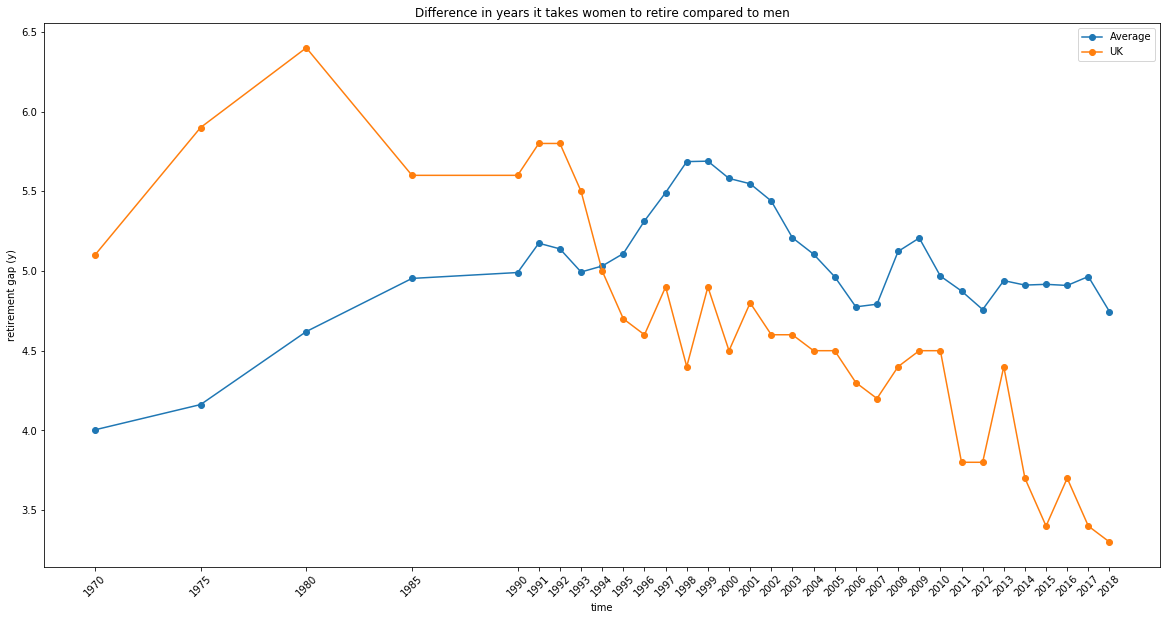

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(new_data.index,new_data['Gap'],label='Average', marker='o')
ax.plot(new_uk_data.index,new_uk_data['Gap'], label='UK', marker='o')
ax.legend()
ax.set(xlabel='time', ylabel='retirement gap (y)',
       title='Difference in years it takes women to retire compared to men')
plt.xticks(new_data.index, rotation='45')

plt.show()

Decreased but was never zero or negative :(

## Merging with gender pay gap data

Source https://stats.oecd.org/index.aspx?queryid=54751

In [36]:
url2 = "data/OECD/all_countries_pay_gap.csv"
pg_data = pd.read_csv(url2)
pg_data.head()

,COU,Country,IND,Indicator,SEX,Sex,AGE,Age Group,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,EMP9,Gender wage gap,ALL_PERSONS,All persons,TOTAL,Total,2000,2000,PC,Percentage,0,Units,NaN,NaN,17.2,NaN,NaN
1,AUS,Australia,EMP9,Gender wage gap,ALL_PERSONS,All persons,TOTAL,Total,2001,2001,PC,Percentage,0,Units,NaN,NaN,14.3,NaN,NaN
2,AUS,Australia,EMP9,Gender wage gap,ALL_PERSONS,All persons,TOTAL,Total,2002,2002,PC,Percentage,0,Units,NaN,NaN,15.0,NaN,NaN
3,AUS,Australia,EMP9,Gender wage gap,ALL_PERSONS,All persons,TOTAL,Total,2003,2003,PC,Percentage,0,Units,NaN,NaN,13.0,NaN,NaN
4,AUS,Australia,EMP9,Gender wage gap,ALL_PERSONS,All persons,TOTAL,Total,2004,2004,PC,Percentage,0,Units,NaN,NaN,14.4,NaN,NaN


In [37]:
oecdValues = pg_data.Value.describe()
oecdValues

count    527.000000
mean      15.335674
std        7.652646
min        0.000000
25%        9.950000
50%       15.000000
75%       19.200000
max       41.700000
Name: Value, dtype: float64

In [38]:
pg_uk_data = pg_data.loc[pg_data['COU'] == 'GBR']
pg_data = pg_data[["Time","Value"]]
pg_uk_data = pg_uk_data[["Time","Value"]]
#pg_data.replace({'Time': 'Latest year'}, 2020, inplace=True)
pg_data.set_index('Time', inplace=True)
pg_uk_data.set_index('Time',inplace=True)

In [39]:
pg_uk_data.rename(index={'Latest year':'2020'}, inplace=True)
pg_uk_data.rename(columns={ 'Value': 'Pay_gap_uk'}, inplace=True)
pg_data = pg_data.groupby(level=0).mean()
pg_data.shape

(19, 1)

In [42]:
oecdValues_uk = pg_uk_data.Pay_gap_uk.describe()
oecdValues_uk

count    19.000000
mean     20.457895
std       3.285882
min      16.400000
25%      17.450000
50%      20.700000
75%      22.750000
max      26.300000
Name: Pay_gap_uk, dtype: float64

In [25]:
pg_uk_data.index = pg_data.index.astype(str).astype(int)
pg_uk_data.index

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
           dtype='int64', name='Time')

###  Merge with retirement data

In [26]:
mergedDf = pd.merge(new_data,pg_data, left_index=True, right_index=True, how='outer')
mergedDf = pd.merge(new_uk_data,mergedDf, left_index=True, right_index=True, how='outer')
mergedDf = pd.merge(pg_uk_data,mergedDf, left_index=True, right_index=True, how='outer')
#mergedDf

In [27]:
mergedDf.rename(columns={ 'Value': 'Pay_gap'}, inplace=True)

In [28]:
#mergedDf = mergedDf[['Retirement_gap','Pay_gap']]

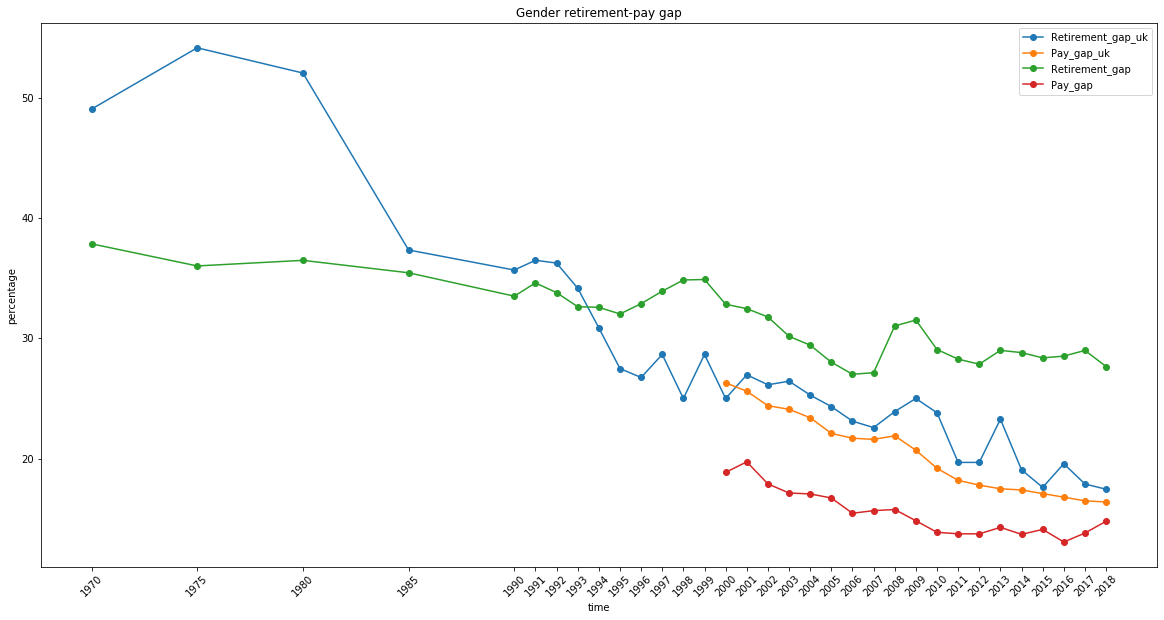

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(mergedDf.index,mergedDf.Retirement_gap_uk,linestyle='-', marker='o',label='Retirement_gap_uk')
ax.plot(mergedDf.index,mergedDf.Pay_gap_uk,linestyle='-', marker='o',label='Pay_gap_uk')
ax.plot(mergedDf.index,mergedDf.Retirement_gap, linestyle='-', marker='o',label='Retirement_gap')
ax.plot(mergedDf.index,mergedDf.Pay_gap,linestyle='-', marker='o',label='Pay_gap')

ax.legend()
ax.set(xlabel='time', ylabel='percentage',
       title='Gender retirement-pay gap')
plt.xticks(new_uk_data.index, rotation='45')

plt.show()

We can see a decreasing trend but it's not zero. A positive correlation between retirement gap and pay gap.

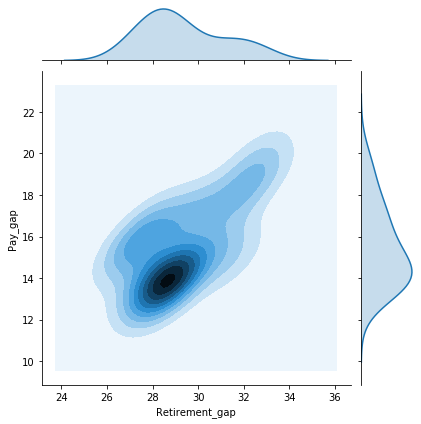

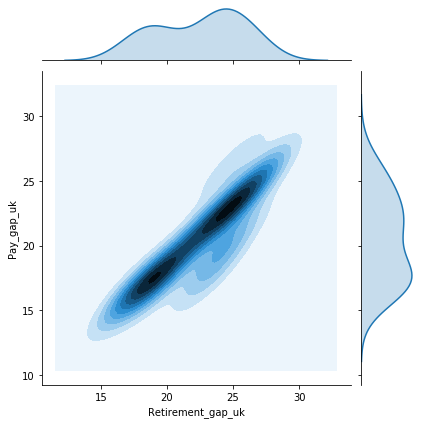

In [30]:
ax1 = sns.jointplot(x=mergedDf.Retirement_gap,y=mergedDf.Pay_gap,kind='kde')
ax2 = sns.jointplot(x=mergedDf.Retirement_gap_uk,y=mergedDf.Pay_gap_uk,kind='kde')

Extras:
Entrepreneurship  : Gender gap in self-employed earnings https://stats.oecd.org/index.aspx?queryid=54681

## Visualization trials

In [31]:
url = 'data/gender-pay-gap-uk-gov/2018.csv.gz'
data = pd.read_csv(url, compression='gzip')
data.head()

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
0,"""Bryanston School"",Incorporated","Bryanston House,\r\nBlandford,\r\nDorset,\r\nD...",00226143,85310,19.6,32.5,NaN,NaN,0.0,0.0,...,55.1,53.3,46.7,https://www.bryanston.co.uk/employment,Michael McGovern (Chief Operating Officer),500 to 999,BRYANSTON SCHOOL INCORPORATED,False,05/04/2019 00:00:00,03/04/2019 13:43:34
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED","19 Smith's Place,\r\nLeith Walk,\r\nEdinburgh,...",SC016876,47730,7.7,-4.2,23.7,-75.2,22.2,82.0,...,88.4,20.3,79.7,NaN,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,05/04/2019 00:00:00,01/04/2019 12:37:21
2,118 LIMITED,"3 Alexandra Gate Ffordd Pengam,\r\nGround Floo...",03951948,61900,7.7,12.7,11.3,10.9,67.0,52.0,...,50.0,56.0,44.0,NaN,Michael Graham (CEO),1000 to 4999,118 LIMITED,False,05/04/2019 00:00:00,06/03/2019 13:26:24
3,123 EMPLOYEES LTD,"34 Roundhay Road,\r\nLeeds,\r\nEngland,\r\nLS7...",10530651,78300,30.0,29.0,-10.0,69.0,46.0,74.0,...,83.0,25.0,75.0,NaN,Chloe Lines (Financial Controller),250 to 499,123 EMPLOYEES LTD,False,05/04/2019 00:00:00,03/04/2019 15:43:17
4,1509 GROUP,"Royal Grammar School,\r\nHigh Street,\r\nGuild...",04104101,"85200,\r\n85310",13.4,12.7,0.0,0.0,0.0,0.0,...,51.6,61.3,38.7,https://www.rgs-guildford.co.uk,Kate Perceval (Bursar),250 to 499,1509 GROUP,False,05/04/2019 00:00:00,18/03/2019 14:03:16


In [32]:
data.shape

(10817, 25)

In [33]:
data.columns

Index(['EmployerName', 'Address', 'CompanyNumber', 'SicCodes',
       'DiffMeanHourlyPercent', 'DiffMedianHourlyPercent',
       'DiffMeanBonusPercent', 'DiffMedianBonusPercent', 'MaleBonusPercent',
       'FemaleBonusPercent', 'MaleLowerQuartile', 'FemaleLowerQuartile',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile', 'CompanyLinkToGPGInfo',
       'ResponsiblePerson', 'EmployerSize', 'CurrentName',
       'SubmittedAfterTheDeadline', 'DueDate', 'DateSubmitted'],
      dtype='object')

In [62]:
data = data[(data.DiffMeanHourlyPercent>-100) & 
     (data.DiffMeanHourlyPercent<100) &
     (data.DiffMedianHourlyPercent>-100) &
     (data.DiffMedianHourlyPercent<100)]

In [63]:
ukGovMean = data.DiffMeanHourlyPercent.describe()
print(ukGovMean)
ukGovMedian = data.DiffMedianHourlyPercent.describe()
print(ukGovMedian)
print(pg_uk_data[pg_uk_data.index == 2018])
# print(oecdValues)
# print(oecdValues_uk)

count    10815.000000
mean        14.166685
std         14.196536
min        -98.700000
25%          4.900000
50%         13.100000
75%         22.400000
max         93.100000
Name: DiffMeanHourlyPercent, dtype: float64
count    10815.000000
mean        11.866556
std         15.467516
min        -92.300000
25%          0.900000
50%          9.500000
75%         21.000000
max         79.300000
Name: DiffMedianHourlyPercent, dtype: float64
      Pay_gap_uk
Time            
2018        16.4


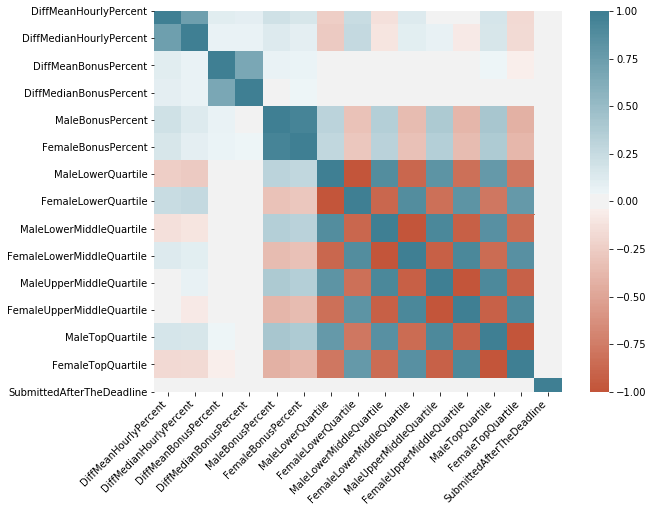

In [46]:
corr = data.corr()
fig = plt.figure(figsize=(10,7))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [47]:
salary_diff_cols = ['DiffMeanHourlyPercent','DiffMedianHourlyPercent','DiffMeanBonusPercent','DiffMedianBonusPercent']
bonus_cols = ['MaleBonusPercent','FemaleBonusPercent']

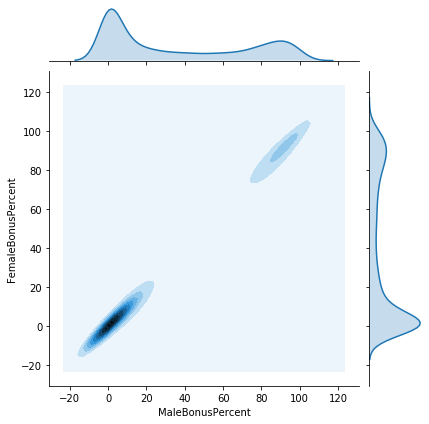

In [48]:
bonus_data = data[bonus_cols]
# sns.jointplot(x=bonus_data.MaleBonusPercent, y=bonus_data.FemaleBonusPercent, kind='scatter')
# sns.jointplot(x=bonus_data.MaleBonusPercent, y=bonus_data.FemaleBonusPercent, kind='hex')
sns.jointplot(x=bonus_data.MaleBonusPercent, y=bonus_data.FemaleBonusPercent, kind='kde')

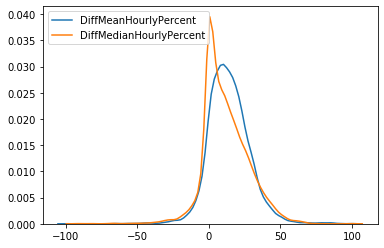

In [49]:
salary_diff_data = data[salary_diff_cols]
sns.kdeplot(salary_diff_data.DiffMeanHourlyPercent)
sns.kdeplot(salary_diff_data.DiffMedianHourlyPercent)

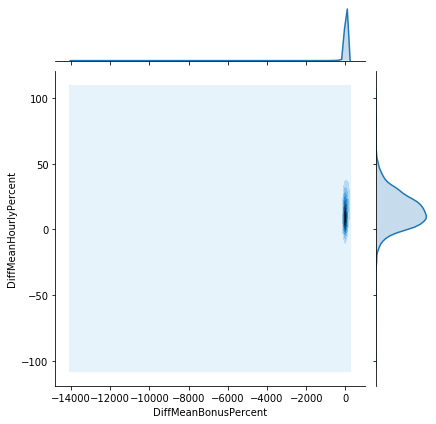

In [50]:
sns.jointplot(x=salary_diff_data.DiffMeanBonusPercent,y=salary_diff_data.DiffMeanHourlyPercent,kind='kde')
#no relation between salary diff and bonus diff

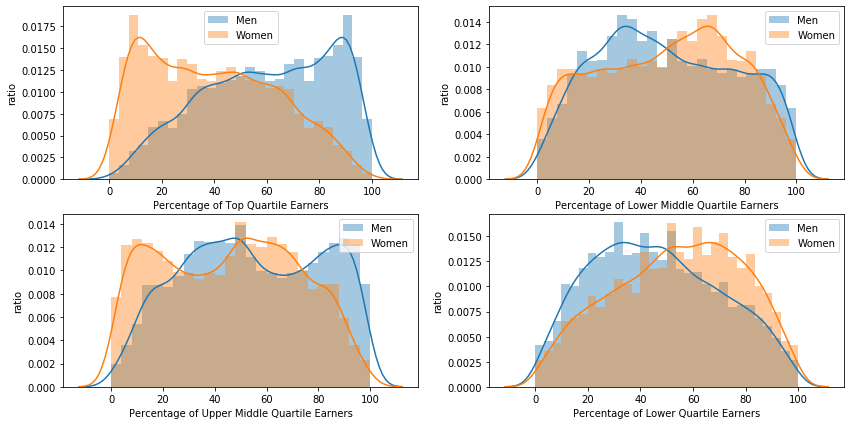

In [51]:
f, axes = plt.subplots(2, 2, figsize=(14, 7), sharex=False)
ax1 = sns.distplot(data.MaleTopQuartile, label='Men', ax=axes[0,0])
ax1 = sns.distplot(data.FemaleTopQuartile, label='Women', ax=axes[0,0])
ax1.set(xlabel='Percentage of Top Quartile Earners', ylabel='ratio')
ax1.legend()

ax2 = sns.distplot(data.MaleLowerMiddleQuartile, label='Men', ax=axes[0,1])
ax2 = sns.distplot(data.FemaleLowerMiddleQuartile, label='Women', ax=axes[0,1])
ax2.set(xlabel='Percentage of Lower Middle Quartile Earners', ylabel='ratio')
ax2.legend()

ax3 = sns.distplot(data.MaleUpperMiddleQuartile, label='Men', ax=axes[1,0])
ax3 = sns.distplot(data.FemaleUpperMiddleQuartile, label='Women', ax=axes[1,0])
ax3.set(xlabel='Percentage of Upper Middle Quartile Earners', ylabel='ratio')
ax3.legend()

ax4 = sns.distplot(data.MaleLowerQuartile, label='Men', ax=axes[1,1])
ax4 = sns.distplot(data.FemaleLowerQuartile, label='Women', ax=axes[1,1])
ax4.set(xlabel='Percentage of Lower Quartile Earners', ylabel='ratio')
ax4.legend()

In [52]:
siccodeUrl = "data/siccodes/SIC07_CH_condensed_list_en.csv"
siccode = pd.read_csv(siccodeUrl)
siccode.head()

,SIC Code,Description
0,1110,"Growing of cereals (except rice), leguminous c..."
1,1120,Growing of rice
2,1130,"Growing of vegetables and melons, roots and tu..."
3,1140,Growing of sugar cane
4,1150,Growing of tobacco


In [53]:
url1 = "data/siccodes/uk-sic-2007-condensed_csv.csv"
sic = pd.read_csv(url1)
sic.head()

,sic_code,sic_description,section,section_description,sic_version
0,1110,"Growing of cereals (except rice), leguminous c...",A,"Agriculture, Forestry and Fishing",SIC 2007
1,1120,Growing of rice,A,"Agriculture, Forestry and Fishing",SIC 2007
2,1130,"Growing of vegetables and melons, roots and tu...",A,"Agriculture, Forestry and Fishing",SIC 2007
3,1140,Growing of sugar cane,A,"Agriculture, Forestry and Fishing",SIC 2007
4,1150,Growing of tobacco,A,"Agriculture, Forestry and Fishing",SIC 2007


In [54]:
#picked up on the internet
def sic_desc(df):
    
    df = df[~df.SicCodes.isna()]
    
    df['SicCodes'] = df.apply(lambda row: row.SicCodes.replace('\n','')\
                                                      .replace('\r','')\
                                                      .split(','), axis=1)
    df = df.explode('SicCodes')
    df['SicCodes'] = pd.to_numeric(df.SicCodes)
    
    return df.merge(sic, how='left', left_on='SicCodes', 
                    right_on='sic_code')

In [55]:
modified_data = sic_desc(data)
modified_data.head()

/Users/shivangi/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted,sic_code,sic_description,section,section_description,sic_version
0,"""Bryanston School"",Incorporated","Bryanston House,\r\nBlandford,\r\nDorset,\r\nD...",00226143,85310,19.6,32.5,NaN,NaN,0.0,0.0,...,500 to 999,BRYANSTON SCHOOL INCORPORATED,False,05/04/2019 00:00:00,03/04/2019 13:43:34,85310.0,General secondary education,P,Education,SIC 2007
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED","19 Smith's Place,\r\nLeith Walk,\r\nEdinburgh,...",SC016876,47730,7.7,-4.2,23.7,-75.2,22.2,82.0,...,250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,05/04/2019 00:00:00,01/04/2019 12:37:21,47730.0,Dispensing chemist in specialised stores,G,Wholesale and retail trade; repair of motor ve...,SIC 2007
2,118 LIMITED,"3 Alexandra Gate Ffordd Pengam,\r\nGround Floo...",03951948,61900,7.7,12.7,11.3,10.9,67.0,52.0,...,1000 to 4999,118 LIMITED,False,05/04/2019 00:00:00,06/03/2019 13:26:24,61900.0,Other telecommunications activities,J,Information and communication,SIC 2007
3,123 EMPLOYEES LTD,"34 Roundhay Road,\r\nLeeds,\r\nEngland,\r\nLS7...",10530651,78300,30.0,29.0,-10.0,69.0,46.0,74.0,...,250 to 499,123 EMPLOYEES LTD,False,05/04/2019 00:00:00,03/04/2019 15:43:17,78300.0,Human resources provision and management of hu...,N,Administrative and support service activities,SIC 2007
4,1509 GROUP,"Royal Grammar School,\r\nHigh Street,\r\nGuild...",04104101,85200,13.4,12.7,0.0,0.0,0.0,0.0,...,250 to 499,1509 GROUP,False,05/04/2019 00:00:00,18/03/2019 14:03:16,85200.0,Primary education,P,Education,SIC 2007


In [56]:
modified_data.section_description.unique

<bound method Series.unique of 0                                                Education
1        Wholesale and retail trade; repair of motor ve...
2                            Information and communication
3            Administrative and support service activities
4                                                Education
                               ...                        
15742        Administrative and support service activities
15743        Administrative and support service activities
15744        Administrative and support service activities
15745    Professional, scientific and technical activities
15746                                        Manufacturing
Name: section_description, Length: 15747, dtype: object>

In [57]:
sad_data = modified_data[(modified_data.DiffMeanHourlyPercent>40)]
sad_data.groupby('section_description').count()['section'].sort_values(ascending=False).head(20)

section_description
Arts, entertainment and recreation                          73
Financial and insurance activities                          71
Professional, scientific and technical activities           61
Wholesale and retail trade; repair of motor vehicles and    53
Construction                                                51
Administrative and support service activities               42
Human health and social work activities                     27
Information and communication                               24
Manufacturing                                               23
Transportation and storage                                  23
Education                                                   15
Real estate activities                                      15
Accommodation and food service activities                    7
Other service activities                                     6
Mining and Quarrying                                         5
Water supply, sewerage, waste manag